In [1]:
import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.activations import relu, sigmoid
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
import scipy
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model

In [2]:
base_dir = "../datasets/main_dataset/"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
def create_generator_with_augmented(train_dir, test_dir):
    train_datagen = ImageDataGenerator(
        rescale=1/255.0,
        rotation_range=40,
        horizontal_flip=True,
        shear_range=0.3,
        vertical_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2
    )
    test_datagen = ImageDataGenerator(
        rescale=1/255.0,
        rotation_range=40,
        horizontal_flip=True,
        shear_range=0.3,
        vertical_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        class_mode="binary",
        target_size=(224, 224),
        batch_size=16
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        class_mode="binary",
        target_size=(224, 224),
        batch_size=16
    )
    return train_generator, test_generator




def create_generator_without_augmentation(train_dir, test_dir):
    train_generator = image_dataset_from_directory(
        train_dir,
        label_mode="binary",
        image_size=(224, 224),
        batch_size=16
    )

    test_generator = image_dataset_from_directory(
        test_dir,
        label_mode="binary",
        image_size=(224, 224),
        batch_size=16
    )
    return train_generator, test_generator

In [4]:
def create_model():
    model = Sequential()
    model.add(Conv2D(128, (3, 3), activation=relu, input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation=relu))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation=relu))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation=relu))
    model.add(MaxPooling2D(2, 2))
    # model.add(Conv2D(128, (3, 3), activation=relu))
    # model.add(MaxPooling2D(2, 2))
    # model.add(Conv2D(128, (3, 3), activation=relu))
    # model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    #model.add(Dense(1024, activation=relu))
    model.add(Dense(512, activation=relu))
    model.add(Dense(1, activation=sigmoid))

    model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=["acc"])
    return model

# Model 1

In [5]:
model1 = create_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

2022-07-21 19:48:43.946153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 19:48:44.011775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 19:48:44.012002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 19:48:44.012544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
train_generator, test_generator = create_generator(train_dir, test_dir)

Found 200 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [7]:
history1 = model1.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator)
)

Epoch 1/100


2022-07-21 19:48:47.142266: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-07-21 19:48:48.137616: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-21 19:48:48.137652: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-21 19:48:48.751406: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains

 1/13 [=>............................] - ETA: 42s - loss: 0.6961 - acc: 0.2500

2022-07-21 19:48:49.656880: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-21 19:48:49.657147: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-21 19:48:50.244489: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-07-21 19:48:50.244524: W tensorflow/core/common_runtime/bfc_allocato

13/13 [==============================] - 8s 354ms/step - loss: 0.8308 - acc: 0.5100 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 2/100
13/13 [==============================] - 2s 172ms/step - loss: 0.6950 - acc: 0.5000 - val_loss: 0.6899 - val_acc: 0.5000
Epoch 3/100
13/13 [==============================] - 2s 179ms/step - loss: 0.6873 - acc: 0.5400 - val_loss: 0.7012 - val_acc: 0.5000
Epoch 4/100
13/13 [==============================] - 2s 172ms/step - loss: 0.7168 - acc: 0.5100 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 5/100
13/13 [==============================] - 2s 175ms/step - loss: 0.6840 - acc: 0.5150 - val_loss: 0.6885 - val_acc: 0.5769
Epoch 6/100
13/13 [==============================] - 3s 185ms/step - loss: 0.7306 - acc: 0.5200 - val_loss: 0.6918 - val_acc: 0.5000
Epoch 7/100
13/13 [==============================] - 2s 180ms/step - loss: 0.6934 - acc: 0.5100 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 8/100
13/13 [==============================] - 3s 183ms/step - loss: 0.6925

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label="training accuracy")
    plt.plot(epochs, val_acc, 'g', label="validation accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label="training loss")
    plt.plot(epochs, val_loss, 'g', label="validation loss")
    plt.legend()

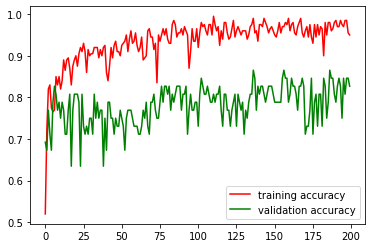

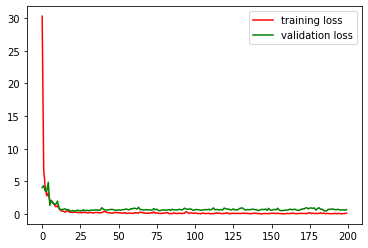

In [21]:
plot_history(history=history1)

In [18]:
def create_model_transfer():
    pre_trained_model = InceptionV3(
        input_shape=(224, 224, 3),
        include_top=False,
        weights="imagenet"
    )

    for layer in pre_trained_model.layers:
        layer.trainable=False

    x = Dropout(0.5)(pre_trained_model.output)
    x = Flatten()(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation=relu)(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation=relu)(x)
    x = Dense(1, activation=sigmoid)(x)

    model = Model(pre_trained_model.input, x)

    model.compile(loss=binary_crossentropy, optimizer=Adam(lr=0.001), metrics=["accuracy"])
    return model

# model 2

In [11]:
model2 = create_model_transfer()
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 alization)                     )                                                             

In [12]:
history1 = model2.fit(
    train_generator,
    epochs=200,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator)
)

Epoch 1/200
13/13 [==============================] - 13s 524ms/step - loss: 30.2784 - accuracy: 0.5200 - val_loss: 4.0569 - val_accuracy: 0.6923
Epoch 2/200
13/13 [==============================] - 3s 204ms/step - loss: 6.7724 - accuracy: 0.7200 - val_loss: 4.3544 - val_accuracy: 0.6731
Epoch 3/200
13/13 [==============================] - 3s 220ms/step - loss: 4.1011 - accuracy: 0.8200 - val_loss: 3.5404 - val_accuracy: 0.7692
Epoch 4/200
13/13 [==============================] - 3s 205ms/step - loss: 2.7891 - accuracy: 0.8300 - val_loss: 3.4966 - val_accuracy: 0.7115
Epoch 5/200
13/13 [==============================] - 3s 205ms/step - loss: 3.2452 - accuracy: 0.7750 - val_loss: 4.8770 - val_accuracy: 0.6731
Epoch 6/200
13/13 [==============================] - 3s 200ms/step - loss: 2.0487 - accuracy: 0.7650 - val_loss: 1.3354 - val_accuracy: 0.7885
Epoch 7/200
13/13 [==============================] - 3s 217ms/step - loss: 1.9669 - accuracy: 0.7700 - val_loss: 2.1021 - val_accuracy: 0.82

In [14]:
plot_history(history1)

KeyError: 'acc'

# Transfer learning with the fold1 directory

In [6]:
base_dir_1 = "../datasets/archive/Fold1/Fold1/Fold1/"
train_dir_1 = os.path.join(base_dir_1, "Train")
test_dir_1 = os.path.join(base_dir_1, "Val")

## Model 3


In [19]:
model3 = create_model_transfer()
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

/media/DATA/projects/monkey pox project/venv/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 conv2d_323 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_328 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_327[0][0]']         
                                                                                                  
 batch_normalization_323 (Batch  (None, 12, 12, 160)  480        ['conv2d_323[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_328 (Batch  (None, 12, 12, 160)  480        ['conv2d_328[0][0]']             
 Normalization)                                                                                   
          

In [20]:
train_generator, test_generator = create_generator_without_augmentation(train_dir_1, test_dir_1)

Found 2142 files belonging to 2 classes.
Found 420 files belonging to 2 classes.


In [21]:
history3 = model3.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator)
)

Epoch 1/25
134/134 [==============================] - 15s 88ms/step - loss: 38.6859 - accuracy: 0.5504 - val_loss: 0.7442 - val_accuracy: 0.6262
Epoch 2/25
134/134 [==============================] - 11s 82ms/step - loss: 0.6901 - accuracy: 0.5551 - val_loss: 0.6519 - val_accuracy: 0.6548
Epoch 3/25
134/134 [==============================] - 11s 83ms/step - loss: 0.6761 - accuracy: 0.5826 - val_loss: 0.5855 - val_accuracy: 0.7405
Epoch 4/25
134/134 [==============================] - 11s 83ms/step - loss: 0.6575 - accuracy: 0.6022 - val_loss: 0.5548 - val_accuracy: 0.7452
Epoch 5/25
134/134 [==============================] - 11s 83ms/step - loss: 0.6706 - accuracy: 0.5994 - val_loss: 0.5741 - val_accuracy: 0.7548
Epoch 6/25
134/134 [==============================] - 11s 83ms/step - loss: 0.6338 - accuracy: 0.6275 - val_loss: 0.5407 - val_accuracy: 0.7548
Epoch 7/25
134/134 [==============================] - 11s 84ms/step - loss: 0.6497 - accuracy: 0.6158 - val_loss: 0.5438 - val_accuracy

In [19]:
plot_history(history3)

KeyError: 'acc'

In [43]:
from tensorflow.keras.applications import EfficientNetB3
from keras.layers import Input
def model123():
  base_model = EfficientNetB3(include_top=False)
  base_model.trainable = True

  for layer in base_model.layers[:-5]:
    layer.trainable = False

  inputs = Input(shape=(224, 224, 3), name="input_layer")
  base_layer = base_model(inputs)
  dropout_layer_1 = Dropout(0.5)(base_layer)
  flat_layer = Flatten()(dropout_layer_1)
  dense_1 = Dense(256, activation="relu")(flat_layer)
  dropout_layer_2 = Dropout(0.5)(dense_1)
  dense_2 = Dense(128, activation="relu")(dropout_layer_2)
  outputs = Dense(1, activation="sigmoid")(dense_2)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [67]:
model4 = model123()
model4.summary()

history4 = model4.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, None, None, 1536)  10783535 
                                                                 
 dropout_19 (Dropout)        (None, 7, 7, 1536)        0         
                                                                 
 flatten_9 (Flatten)         (None, 75264)             0         
                                                                 
 dense_26 (Dense)            (None, 256)               19267840  
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               3289

/media/DATA/projects/monkey pox project/venv/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


134/134 [==============================] - 41s 232ms/step - loss: 1.0998 - accuracy: 0.8268 - val_loss: 1.1171 - val_accuracy: 0.7714
Epoch 2/50
134/134 [==============================] - 21s 155ms/step - loss: 0.5849 - accuracy: 0.9104 - val_loss: 1.0297 - val_accuracy: 0.7929
Epoch 3/50
134/134 [==============================] - 21s 155ms/step - loss: 0.3147 - accuracy: 0.9468 - val_loss: 1.0999 - val_accuracy: 0.7571
Epoch 4/50
134/134 [==============================] - 21s 156ms/step - loss: 0.2376 - accuracy: 0.9566 - val_loss: 0.6200 - val_accuracy: 0.8619
Epoch 5/50
134/134 [==============================] - 21s 155ms/step - loss: 0.0945 - accuracy: 0.9753 - val_loss: 1.7904 - val_accuracy: 0.7381
Epoch 6/50
134/134 [==============================] - 21s 155ms/step - loss: 0.1279 - accuracy: 0.9725 - val_loss: 1.0791 - val_accuracy: 0.8357
Epoch 7/50
134/134 [==============================] - 21s 155ms/step - loss: 0.0943 - accuracy: 0.9795 - val_loss: 1.1750 - val_accuracy: 0.8

In [45]:
plot_history(history4)

NameError: name 'plot_history' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
def evaluation(model):
    test_data = tf.keras.preprocessing.image_dataset_from_directory(directory="../datasets/monkeypox/Fold1/Fold1/Fold1/Test",
                                                                 image_size=(224, 224),
                                                                 label_mode="binary",
                                                                 batch_size=32,
                                                                shuffle=False)
    y_pred = tf.math.round(model.predict(test_data))
    y_true = []
    for images, labels in test_data.unbatch():
        y_true.append(labels.numpy())     
    print(f"accuracy_score = {accuracy_score(y_true, y_pred)}")
    print(classification_report(y_true, y_pred, target_names=train_generator.class_names))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm.astype("int"), annot=True)

Found 45 files belonging to 2 classes.
2/2 [==============================] - 0s 198ms/step
accuracy_score = 0.9333333333333333
              precision    recall  f1-score   support

   Monkeypox       0.87      1.00      0.93        20
      Others       1.00      0.88      0.94        25

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



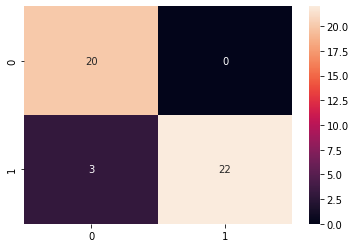

In [64]:
evaluation(model4)

In [66]:
model4.save("../models/model1.h5")

Found 45 files belonging to 2 classes.
2/2 [==============================] - 2s 189ms/step
accuracy_score = 0.8222222222222222
              precision    recall  f1-score   support

   Monkeypox       0.73      0.95      0.83        20
      Others       0.95      0.72      0.82        25

    accuracy                           0.82        45
   macro avg       0.84      0.83      0.82        45
weighted avg       0.85      0.82      0.82        45



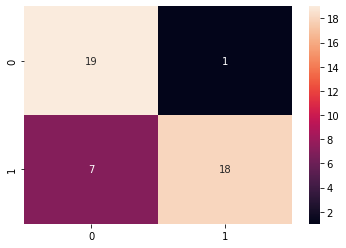

In [68]:
evaluation(model4)

In [4]:
from keras.models import load_model
model = load_model("../models/model1.h5")
import pickle
with open("../models/model1_pkl", "wb") as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://a9bd8d4e-72e2-4020-b200-e661bf78458a/assets


INFO:tensorflow:Assets written to: ram://a9bd8d4e-72e2-4020-b200-e661bf78458a/assets
